### Setup

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
query_data_path = '../dune/data/query.pickle'
query = pd.read_pickle(query_data_path)

In [8]:
query

,eth_price,eth_sqaured_price,funding_rate,hour,normalization_factor,osqth_price,rolling_corr_eth_squeeth,rolling_corr_funding_osqth,squeeth_price
0,3112.53,9687843.0009,0.006905,2022-01-11T07:00:00+00:00,0.999701,1085.939588,None,None,10862648.485064
1,3121.989414,9746817.898697,0.007711,2022-01-11T08:00:00+00:00,0.999515,1119.910978,1,1,11204543.800037
2,3118.32,9723919.6224,0.008414,2022-01-11T09:00:00+00:00,0.998985,1127.86728,0.833589,0.954041,11290127.247571
3,3115.97,9709269.0409,0.008484,2022-01-11T10:00:00+00:00,0.998918,1136.104831,0.554795,0.968056,11373355.797651
4,3107.206006,9654729.161889,0.009649,2022-01-11T11:00:00+00:00,0.998148,1168.579202,-0.394294,0.987015,11707478.760668
...,...,...,...,...,...,...,...,...,...
1683,3305.231026,10924552.137888,0.001383,2022-04-08T10:00:00+00:00,0.748332,828.743167,0.939991,-0.754606,11074536.5739
1684,3287.836621,10809869.648699,0.001407,2022-04-08T11:00:00+00:00,0.748185,825.008152,0.951486,-0.816081,11026799.587206
1685,3250.98,10568870.9604,0.001407,2022-04-08T12:00:00+00:00,0.748185,827.866489,0.921647,-0.824181,11065003.224108
1686,3237.129152,10479005.146533,0.001407,2022-04-08T13:00:00+00:00,0.748185,813.575739,0.918764,-0.803506,10873997.546567


In [60]:
query = query.fillna(0)
query['eth_squared_minus_squeeth_price'] = query['squeeth_price'] - query['eth_sqaured_price']

### Positive Correlations

In [75]:
query[query['rolling_corr_funding_osqth'] > 0.80][5:]

,eth_price,eth_sqaured_price,funding_rate,hour,normalization_factor,osqth_price,rolling_corr_eth_squeeth,rolling_corr_funding_osqth,squeeth_price,eth_squared_minus_squeeth_price
34,3375.180000,1.139184e+07,0.009716,2022-01-12T17:00:00+00:00,0.990463,1339.545527,0.963392,0.880499,1.352444e+07,2.132603e+06
35,3381.806499,1.143662e+07,0.009536,2022-01-12T18:00:00+00:00,0.990386,1340.601864,0.969595,0.905237,1.353615e+07,2.099537e+06
36,3379.325155,1.141984e+07,0.009536,2022-01-12T19:00:00+00:00,0.990386,1342.834936,0.983712,0.931373,1.355870e+07,2.138862e+06
37,3390.790000,1.149746e+07,0.009551,2022-01-12T20:00:00+00:00,0.989373,1336.532049,0.985926,0.936121,1.350888e+07,2.011419e+06
38,3393.027203,1.151263e+07,0.009502,2022-01-12T21:00:00+00:00,0.988958,1312.467498,0.983360,0.943474,1.327121e+07,1.758580e+06
39,3381.267230,1.143297e+07,0.008428,2022-01-12T22:00:00+00:00,0.988728,1309.759092,0.983125,0.950576,1.324691e+07,1.813940e+06
40,3383.415099,1.144750e+07,0.008428,2022-01-12T23:00:00+00:00,0.988728,1267.777663,0.973372,0.947647,1.282231e+07,1.374810e+06
41,3373.140000,1.137807e+07,0.008428,2022-01-13T00:00:00+00:00,0.988728,1270.140901,0.968757,0.944675,1.284621e+07,1.468136e+06
42,3360.310000,1.129168e+07,0.008428,2022-01-13T01:00:00+00:00,0.988728,1268.981361,0.966925,0.943662,1.283448e+07,1.542798e+06
43,3341.970000,1.116876e+07,0.008428,2022-01-13T02:00:00+00:00,0.988728,1267.566439,0.965273,0.939716,1.282017e+07,1.651408e+06


2022-01-27 to 2022-01-29


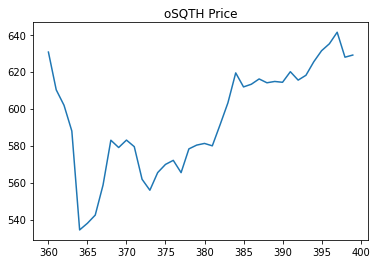

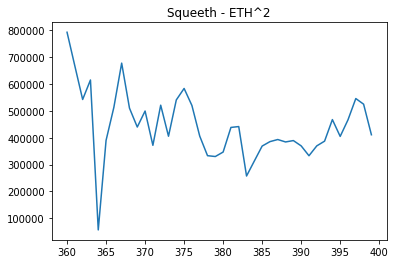

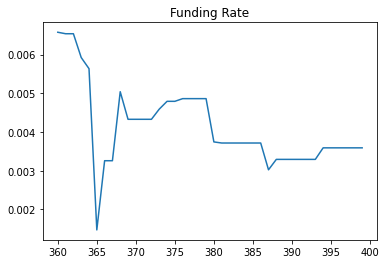

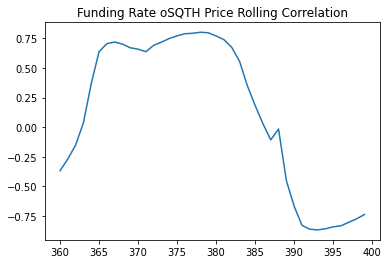

In [95]:
start = 360
end = 400 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-02-21 to 2022-02-24


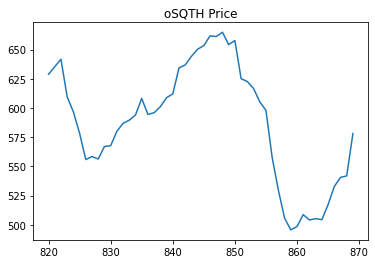

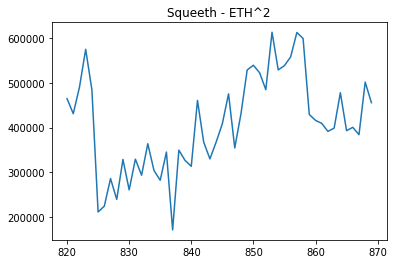

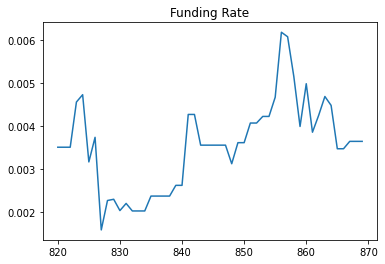

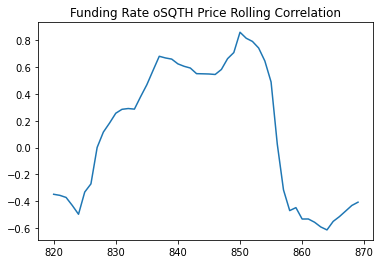

In [88]:
start = 820
end = 870 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-01-22 to 2022-01-24


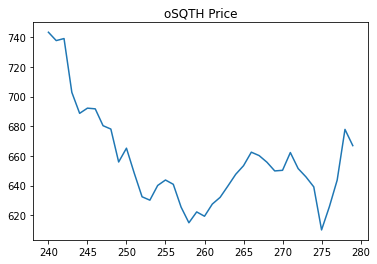

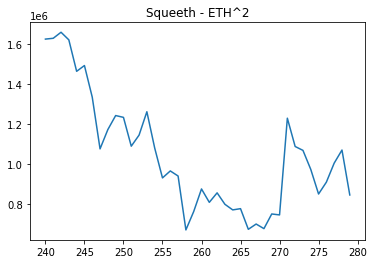

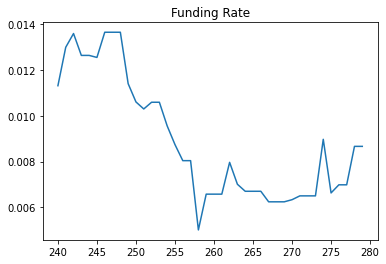

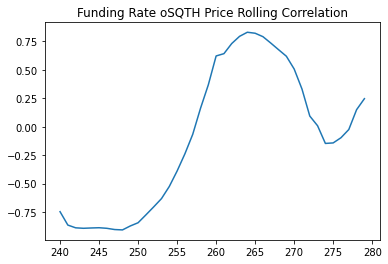

In [94]:
start = 240
end = 280 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-01-12 to 2022-01-17


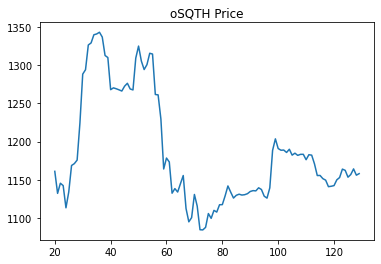

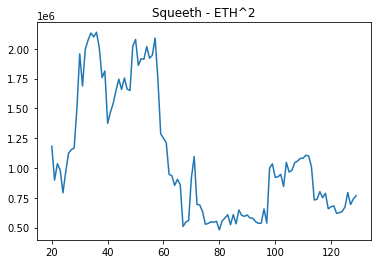

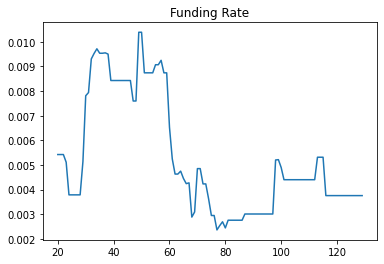

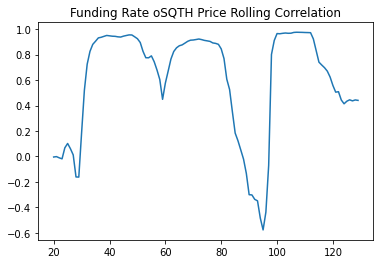

In [93]:
start = 20
end = 130 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

### Negative Correlations

In [71]:
query[query['rolling_corr_funding_osqth'] < -0.9]

,eth_price,eth_sqaured_price,funding_rate,hour,normalization_factor,osqth_price,rolling_corr_eth_squeeth,rolling_corr_funding_osqth,squeeth_price,eth_squared_minus_squeeth_price
217,2859.109434,8.174507e+06,0.008226,2022-01-21T06:00:00+00:00,0.947221,863.527087,0.959541,-0.919086,9.116431e+06,9.419244e+05
218,2860.880000,8.184634e+06,0.006413,2022-01-21T07:00:00+00:00,0.946578,843.140294,0.960563,-0.900938,8.907243e+06,7.226090e+05
247,2487.820000,6.189248e+06,0.013639,2022-01-22T13:00:00+00:00,0.936507,680.386355,0.929964,-0.903895,7.265149e+06,1.075900e+06
248,2463.480000,6.068734e+06,0.013639,2022-01-22T14:00:00+00:00,0.936507,678.114160,0.924698,-0.907189,7.240886e+06,1.172152e+06
480,2655.951784,7.054080e+06,0.004043,2022-02-03T09:00:00+00:00,0.881266,671.740997,0.977683,-0.932238,7.622454e+06,5.683737e+05
481,2603.330000,6.777327e+06,0.004043,2022-02-03T10:00:00+00:00,0.881266,652.584180,0.981078,-0.924648,7.405075e+06,6.277481e+05
765,2912.230000,8.481084e+06,0.003232,2022-02-18T02:00:00+00:00,0.852343,754.078060,0.988596,-0.900488,8.847117e+06,3.660333e+05
801,2624.280000,6.886846e+06,0.003686,2022-02-20T14:00:00+00:00,0.845588,631.220644,0.980270,-0.937164,7.464871e+06,5.780256e+05
802,2648.370000,7.013864e+06,0.003686,2022-02-20T15:00:00+00:00,0.845588,632.569048,0.980247,-0.936130,7.480817e+06,4.669538e+05
803,2646.350000,7.003168e+06,0.003686,2022-02-20T16:00:00+00:00,0.845588,636.554805,0.982838,-0.934376,7.527953e+06,5.247851e+05


2022-01-20 to 2022-01-23


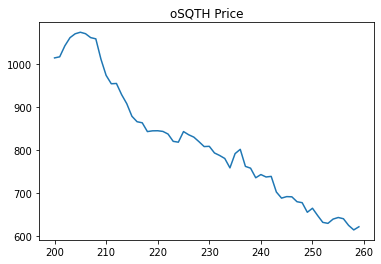

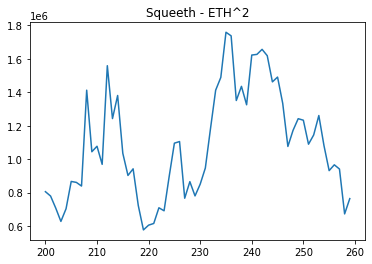

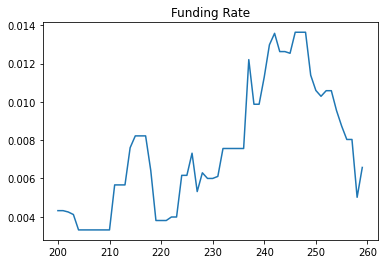

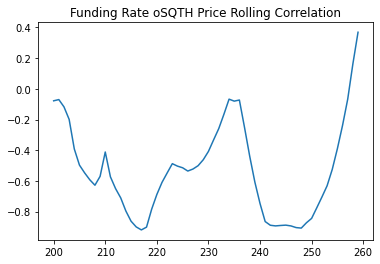

In [96]:
start = 200
end = 260 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-02-02 to 2022-02-04


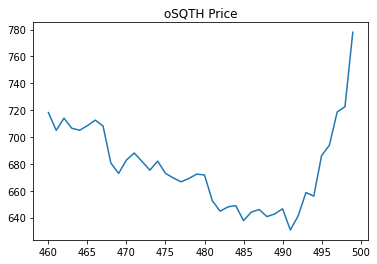

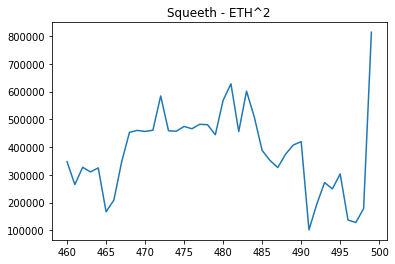

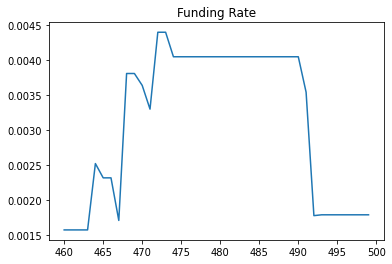

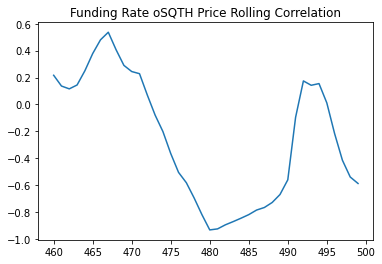

In [98]:
start = 460
end = 500 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-02-15 to 2022-02-21


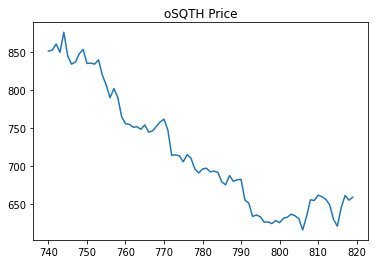

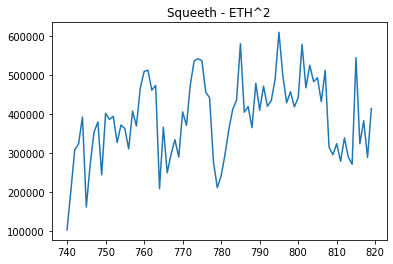

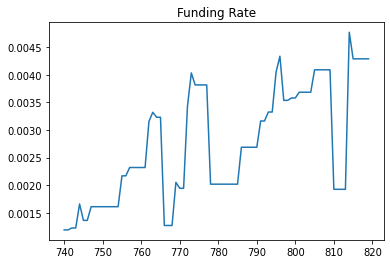

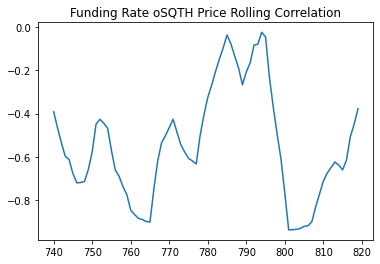

In [100]:
start = 740
end = 820 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-04-01 to 2022-04-03


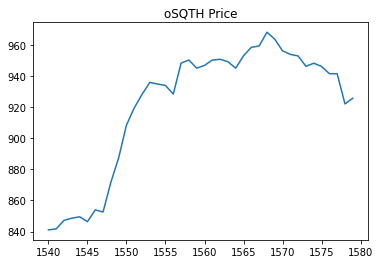

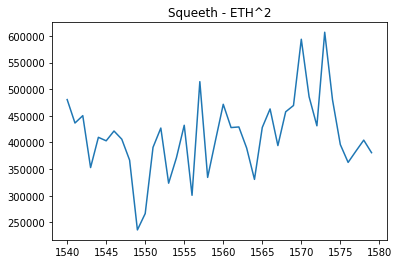

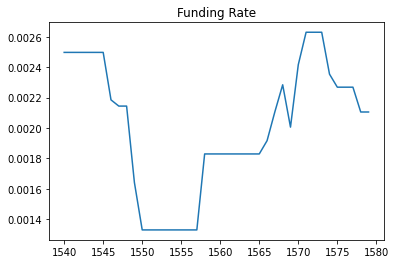

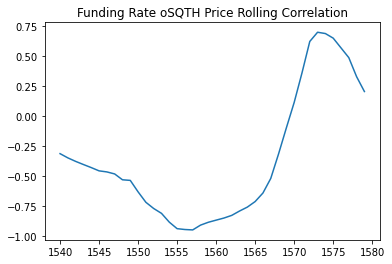

In [101]:
start = 1540
end = 1580 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()

2022-04-06 to 2022-04-08


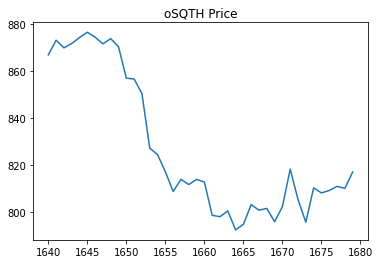

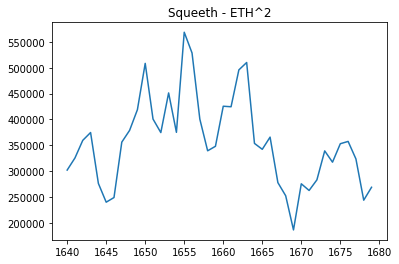

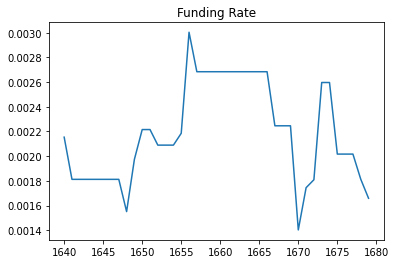

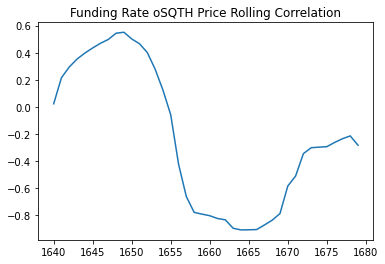

In [102]:
start = 1640
end = 1680 

print('{} to {}'.format(query.loc[start].hour[:10], query.loc[end].hour[:10]))

query.iloc[start:end]['osqth_price'].plot(title='oSQTH Price')
plt.show()

query.iloc[start:end]['eth_squared_minus_squeeth_price'].plot(title='Squeeth - ETH^2')
plt.show()

query.iloc[start:end]['funding_rate'].plot(title='Funding Rate')
plt.show()

query.iloc[start:end]['rolling_corr_funding_osqth'].plot(title='Funding Rate oSQTH Price Rolling Correlation')
plt.show()